# 1.2_artificial_neural_network

In [1]:
import os
import struct
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def load_mnist(path, kind='train'):
    '''Load mnist data from `path`'''
    # allow kind = 'test'
    if kind == 'test':
        kind = 't10k'
    labels_path = os.path.join(path, f"{kind}-labels-idx1-ubyte")
    images_path = os.path.join(path, f"{kind}-images-idx3-ubyte")
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        imags = ((images/255)-.5)*2
    
    return images, labels

In [4]:
X_train, y_train = load_mnist('../data/', kind='train')

In [5]:
print(f"Row, cols: {X_train.shape}")

Row, cols: (60000, 784)


In [6]:
X_test, y_test = load_mnist('../data', kind='test')

In [7]:
print(f"Row, cols: {X_test.shape}")

Row, cols: (10000, 784)


In [8]:
import matplotlib.pyplot as plt

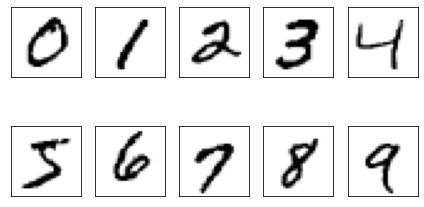

In [9]:
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

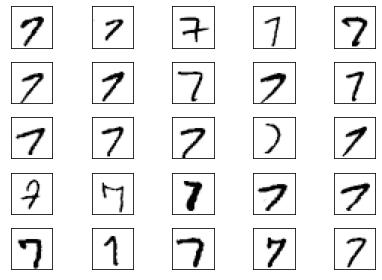

In [10]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [11]:
import numpy as np

In [12]:
np.savez_compressed('minist_scaled.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [13]:
mnist = np.load('./minist_scaled.npz')

In [14]:
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [15]:
X_train = mnist['X_train']

In [16]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

In [20]:
from src.neural_net_mlp import NeuralNetMLP

In [25]:
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()

In [43]:
nn = NeuralNetMLP(n_hidden=100, l2=0.01, epochs=200, eta=0.0005, minibatch_size=100, shuffle=True, seed=1)

In [44]:
X_train_ = X_train[:55000]
y_train_ = y_train[:55000]
X_valid_ = X_train[55000:]
y_valid_ = y_train[55000:]

In [45]:
nn.fit(X_train=X_train_, y_train=y_train_, X_valid = X_valid_, y_valid=y_valid_)

INFO:src.neural_net_mlp:001/200 | Cost: 59216.95 | Train/Valid Acc. 85.31/ 89.30
INFO:src.neural_net_mlp:002/200 | Cost: 46327.38 | Train/Valid Acc. 88.64/ 91.66
INFO:src.neural_net_mlp:003/200 | Cost: 40546.93 | Train/Valid Acc. 89.51/ 92.58
INFO:src.neural_net_mlp:004/200 | Cost: 37591.46 | Train/Valid Acc. 90.08/ 92.62
INFO:src.neural_net_mlp:005/200 | Cost: 35219.94 | Train/Valid Acc. 91.06/ 93.32
INFO:src.neural_net_mlp:006/200 | Cost: 33699.68 | Train/Valid Acc. 91.30/ 93.52
INFO:src.neural_net_mlp:007/200 | Cost: 32364.81 | Train/Valid Acc. 91.40/ 93.74
INFO:src.neural_net_mlp:008/200 | Cost: 32160.51 | Train/Valid Acc. 91.78/ 93.82
INFO:src.neural_net_mlp:009/200 | Cost: 31161.06 | Train/Valid Acc. 92.08/ 93.80
INFO:src.neural_net_mlp:010/200 | Cost: 30304.48 | Train/Valid Acc. 92.23/ 93.72
INFO:src.neural_net_mlp:011/200 | Cost: 28919.26 | Train/Valid Acc. 92.39/ 93.96
INFO:src.neural_net_mlp:012/200 | Cost: 28208.93 | Train/Valid Acc. 92.52/ 94.52
INFO:src.neural_net_mlp:013/

Text(0.5, 0, 'Epochs')

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 2.0016666666666665
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cm

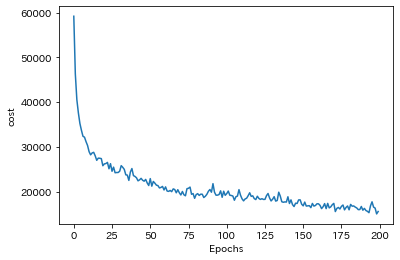

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('cost')
plt.xlabel('Epochs')

In [49]:
logging.basicConfig(level=logging.ERROR)
logger = logging.getLogger()

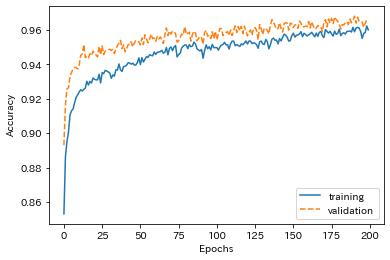

In [51]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

In [52]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred)/X_test.shape[0]
print(f"Test accuracy {acc * 100:.2f}%")

Test accuracy 95.59%


In [53]:
miscl_img = X_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 2.0016666666666665
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cm

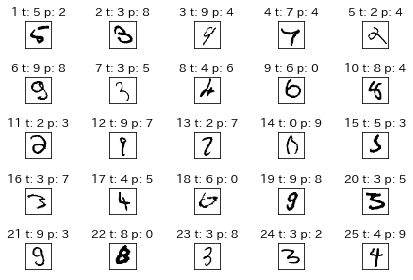

In [54]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f"{i+1} t: {correct_lab[i]} p: {miscl_lab[i]}")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()